# 3c. Bag of Words Word Vectorizing Methods (III): Hashing Vectorizer

Counts and frequencies can be very useful, but one limitation of these methods is that the vocabulary can become very large.

This, in turn, will require large vectors for encoding documents and impose large requirements on memory and slow down algorithms.

A clever work around is to use a one way hash of words to convert them to integers.

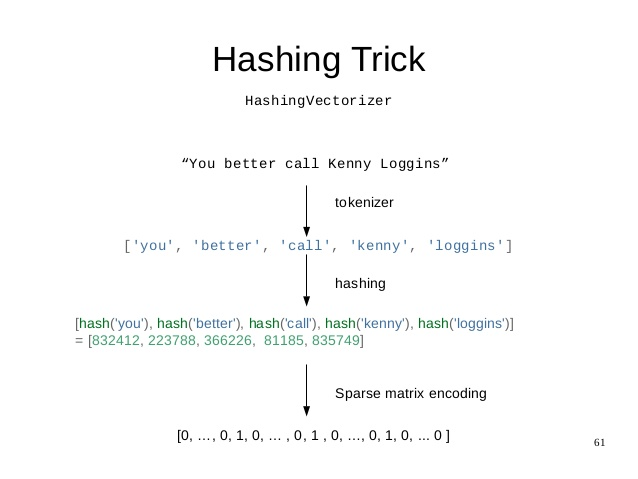

The clever part is that no vocabulary is required and you can choose an arbitrary-long fixed length vector. A downside is that the hash is a one-way function so there is no way to convert the encoding back to a word (which may not matter for many supervised learning tasks).

The HashingVectorizer class implements this approach that can be used to consistently hash words, then tokenize and encode documents as needed.

In [132]:
# import necessary libraries

import pandas as pd
import numpy as np
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import HashingVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import BernoulliNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from  sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [133]:
# read the data into a DataFrame
df = pd.read_csv('2_explored.csv', index_col=0)

Here, I will vectorize the text and transform it to a matrix form so that I can feed the matrix to machine learning algorithms. Xs are the words and y is the rating stored in 'overall' column.

In [134]:
vect = HashingVectorizer(n_features=2000, ngram_range=(1,1))
                       
vect.fit(df.clean_text)
X = vect.transform(df.clean_text)

In [135]:
# assign the target variable 'overall' to y
y = df.rating

We will train the data on one set and test on a set not seen before to reduce bias.

In [136]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 123,
                                                    stratify = y)

I will define a function to better visualize the test results given by the confusion matrix.

In [137]:
# Function for plotting a good-looking confusion matrix

def plot_confusion_matrix(y_test, y_pred, title, color):
    
    '''This function takes as input: 
            a target test variable y_test (pandas series of type integer), 
            a target predicted variable y_pred (pandas series of type integer), 
            a colormap color (string) and 
            a title (string). 
        It plots a confusion matrix of y_test and y_pred with the input colormap.
    '''
    
    cm_ratio = np.round(confusion_matrix(y_test, y_pred) / len(y_test), decimals=2)
    fig = plt.figure(figsize=(4, 4))
    plt.clf()
    plt.style.use('classic')
    plt.imshow(cm_ratio, interpolation='nearest', cmap=color)
    classNames = ['Neg_Review',' Pos_Review']
    plt.title(title, fontsize=20)
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, fontsize=15)
    plt.yticks(tick_marks, classNames, fontsize=15, rotation=90)
    s = [['TNR','FPR'], ['FNR', 'TPR']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm_ratio[i][j]), fontsize=15, 
                 fontweight='bold', horizontalalignment="center")
    return plt.show()

I will code a function to facilitate fitting a classifier to training data, predicting on test data, printing the accuracy and cross validation scores along with the classification report and showing the confusion matrix results using the function above.

In [138]:
def fit_predict_print_plot(my_classifier, my_title):
    
    '''This function takes an instance of a classifier and my_title string, fits to training data, 
    predicts on test data, prints and plots the results'''
    
    # Fitting the classifier to the training data split
    my_classifier.fit(X_train, y_train)

    # Predicting on the test split
    y_predicted = my_classifier.predict(X_test)

    # Checking the accuracy and the cross validation scores
    print('accuracy on training set: ', my_classifier.score(X_train, y_train))
    print('accuracy on test set: ', accuracy_score(y_test, y_predicted))
    print('croos validation score on whole data set: ', 
          np.mean(cross_val_score(my_classifier, X, y, cv = 5)), '\n')

    # Checking the results with the Classification report
    print (classification_report(y_test, y_predicted))
    
    # Checking the results visually by Plotting the confusion matrix with "plot_confusion_matrix" function I defined above
    plot_confusion_matrix(y_test, y_predicted, 
                      title = my_title, 
                      color=plt.cm.Set3)
    return(y_predicted)

Starting with logistic regression, I will use different classification algorithms to predict the ratings of the reviews.

## 3.1. Logistic Regression

accuracy on training set:  0.8447058823529412
accuracy on test set:  0.784037558685446
croos validation score on whole data set:  0.8024359996456727 

              precision    recall  f1-score   support

           0       1.00      0.04      0.08        48
           1       0.78      1.00      0.88       165

    accuracy                           0.78       213
   macro avg       0.89      0.52      0.48       213
weighted avg       0.83      0.78      0.70       213



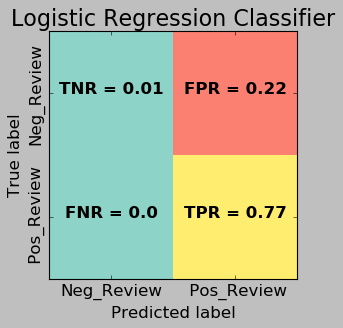

In [139]:
# Instantiating the logistic regression classifier logreg
logreg = LogisticRegression(penalty = 'l2', C = 1, solver='newton-cg', random_state=123)

# Calling the fit_predict_print_plot function I defined above
y_predicted_logreg = fit_predict_print_plot(logreg, 'Logistic Regression Classifier')

## 3.2. K-Neighbors Classifier

accuracy on training set:  0.8588235294117647
accuracy on test set:  0.8215962441314554
croos validation score on whole data set:  0.8250686508991054 

              precision    recall  f1-score   support

           0       0.71      0.35      0.47        48
           1       0.84      0.96      0.89       165

    accuracy                           0.82       213
   macro avg       0.77      0.66      0.68       213
weighted avg       0.81      0.82      0.80       213



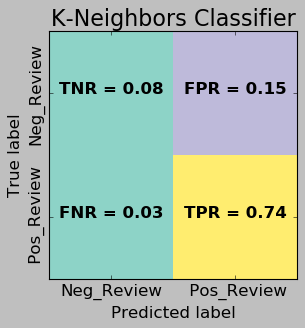

In [140]:
# Instantiating the KNeighborsClassifier knn
knn = KNeighborsClassifier(n_neighbors=5)

# Calling the fit_predict_print_plot function I defined above
y_predicted_knn = fit_predict_print_plot(knn, 'K-Neighbors Classifier')

## 3.3. Linear SVM

accuracy on training set:  0.96
accuracy on test set:  0.8356807511737089
croos validation score on whole data set:  0.8391575870316237 

              precision    recall  f1-score   support

           0       0.76      0.40      0.52        48
           1       0.85      0.96      0.90       165

    accuracy                           0.84       213
   macro avg       0.80      0.68      0.71       213
weighted avg       0.83      0.84      0.82       213



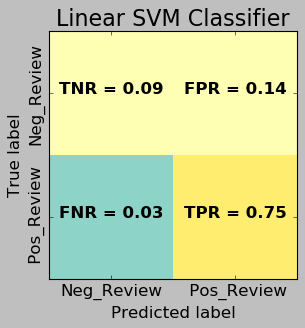

In [141]:
# Instantiating the KNeighborsClassifier knn
l_svm = SVC(kernel='linear', random_state=123)

# Calling the fit_predict_print_plot function I defined above
y_predicted_l_svm = fit_predict_print_plot(l_svm, 'Linear SVM Classifier')

## 3.4. Kernel SVM

accuracy on training set:  0.7764705882352941
accuracy on test set:  0.7746478873239436
croos validation score on whole data set:  0.7761094871113473 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.77      1.00      0.87       165

    accuracy                           0.77       213
   macro avg       0.39      0.50      0.44       213
weighted avg       0.60      0.77      0.68       213



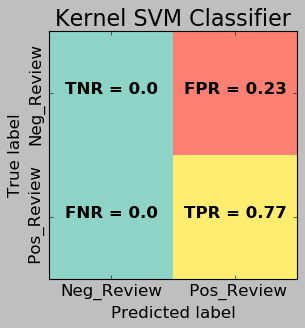

In [142]:
# Instantiating the KNeighborsClassifier knn
k_svm = SVC(kernel='rbf', gamma='auto')

# Calling the fit_predict_print_plot function I defined above
y_predicted_k_svm = fit_predict_print_plot(k_svm, 'Kernel SVM Classifier')

## 3.5. Decision Tree Classifier

accuracy on training set:  0.7764705882352941
accuracy on test set:  0.7746478873239436
croos validation score on whole data set:  0.7761094871113473 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.77      1.00      0.87       165

    accuracy                           0.77       213
   macro avg       0.39      0.50      0.44       213
weighted avg       0.60      0.77      0.68       213



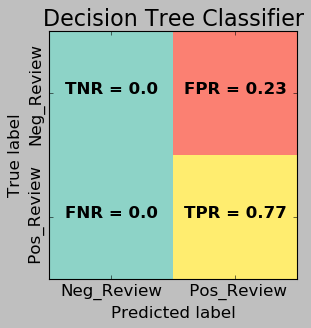

In [143]:
# Instantiating the Decision Tree Classifier dt
dt = DecisionTreeClassifier(max_depth = 6, max_features = 0.6, 
                             min_samples_leaf = 0.08, random_state = 123)

# Calling the fit_predict_print_plot function I defined above
y_predicted_dt = fit_predict_print_plot(dt, 'Decision Tree Classifier')

## 3.6. Random Forest 

accuracy on training set:  0.9988235294117647
accuracy on test set:  0.7981220657276995
croos validation score on whole data set:  0.8128044999557092 

              precision    recall  f1-score   support

           0       0.73      0.17      0.27        48
           1       0.80      0.98      0.88       165

    accuracy                           0.80       213
   macro avg       0.76      0.57      0.58       213
weighted avg       0.79      0.80      0.74       213



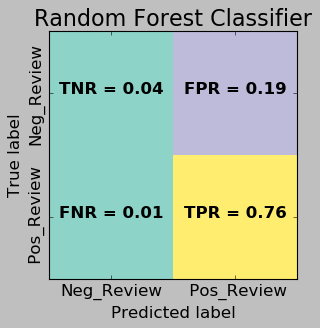

In [144]:
# Instantiating the Random Forest Classifier rf
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=123)

# Calling the fit_predict_print_plot function I defined above
y_predicted_rf = fit_predict_print_plot(rf, 'Random Forest Classifier')

## 3.7. AdaBoosting

accuracy on training set:  0.7835294117647059
accuracy on test set:  0.7746478873239436
croos validation score on whole data set:  0.7751749490654619 

              precision    recall  f1-score   support

           0       0.50      0.02      0.04        48
           1       0.78      0.99      0.87       165

    accuracy                           0.77       213
   macro avg       0.64      0.51      0.46       213
weighted avg       0.71      0.77      0.68       213



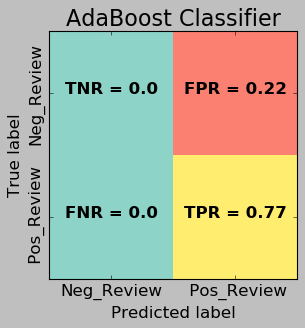

In [145]:
# Instantiating the AdaBoost Classifier adb
adb = AdaBoostClassifier(base_estimator = dt, n_estimators = 100)

# Calling the fit_predict_print_plot function I defined above
y_predicted_adb = fit_predict_print_plot(adb, 'AdaBoost Classifier')

## 3.8. GradientBoosting

accuracy on training set:  0.9988235294117647
accuracy on test set:  0.8075117370892019
croos validation score on whole data set:  0.8288068030826468 

              precision    recall  f1-score   support

           0       0.62      0.38      0.47        48
           1       0.84      0.93      0.88       165

    accuracy                           0.81       213
   macro avg       0.73      0.65      0.68       213
weighted avg       0.79      0.81      0.79       213



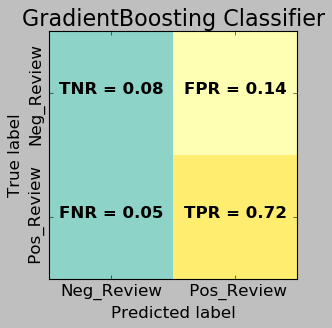

In [146]:
# Instantiating the GradientBoosting Classifier gbt
gbt = GradientBoostingClassifier(n_estimators=300, max_depth =3, random_state=123)

# Calling the fit_predict_print_plot function I defined above
y_predicted_gbt = fit_predict_print_plot(gbt, 'GradientBoosting Classifier')

## 3.9. Stochastic Gradient Boosting

accuracy on training set:  0.9976470588235294
accuracy on test set:  0.784037558685446
croos validation score on whole data set:  0.836309681991319 

              precision    recall  f1-score   support

           0       0.54      0.27      0.36        48
           1       0.81      0.93      0.87       165

    accuracy                           0.78       213
   macro avg       0.68      0.60      0.62       213
weighted avg       0.75      0.78      0.76       213



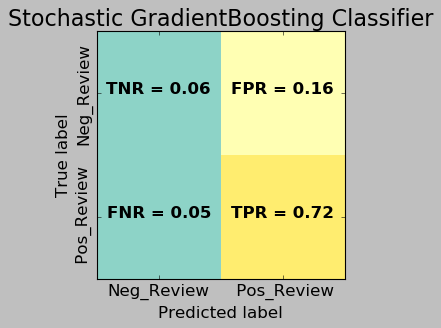

In [147]:
# Instantiating the Stochastic GradientBoosting Classifier sgbt
sgb = GradientBoostingClassifier(max_depth=3, subsample=0.8, 
                                   max_features=0.2, n_estimators=300, random_state=123)

# Calling the fit_predict_print_plot function I defined above
y_predicted_sgb = fit_predict_print_plot(sgb, 'Stochastic GradientBoosting Classifier')

## 3.10. XGBoost

accuracy on training set:  0.8741176470588236
accuracy on test set:  0.812206572769953
croos validation score on whole data set:  0.8156391177252192 

              precision    recall  f1-score   support

           0       0.72      0.27      0.39        48
           1       0.82      0.97      0.89       165

    accuracy                           0.81       213
   macro avg       0.77      0.62      0.64       213
weighted avg       0.80      0.81      0.78       213



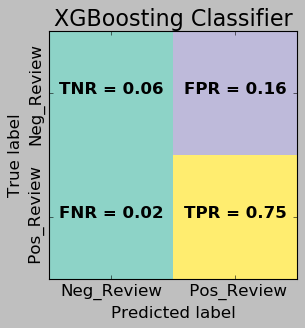

In [148]:
# Instantiating the XGBoosting Classifier xgb
xgb = XGBClassifier(random_state=123)

# Calling the fit_predict_print_plot function I defined above
y_predicted_xgb = fit_predict_print_plot(xgb, 'XGBoosting Classifier')

## 3.11. CatBoost

accuracy on training set:  0.9741176470588235
accuracy on test set:  0.8075117370892019
croos validation score on whole data set:  0.8353884312162283 

              precision    recall  f1-score   support

           0       0.63      0.35      0.45        48
           1       0.83      0.94      0.88       165

    accuracy                           0.81       213
   macro avg       0.73      0.65      0.67       213
weighted avg       0.79      0.81      0.79       213



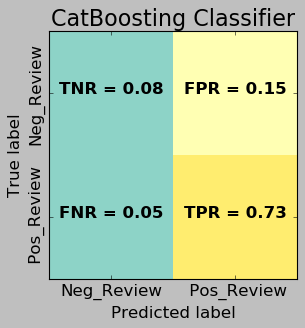

In [149]:
# Instantiating the Cat Boosting Classifier cb
cb = CatBoostClassifier(verbose=False, random_state=123)

# Calling the fit_predict_print_plot function I defined above
y_predicted_cb = fit_predict_print_plot(cb, 'CatBoosting Classifier')

## 3.12. Naive Bayes

accuracy on training set:  0.82
accuracy on test set:  0.7230046948356808
croos validation score on whole data set:  nan 

              precision    recall  f1-score   support

           0       0.08      0.02      0.03        48
           1       0.77      0.93      0.84       165

    accuracy                           0.72       213
   macro avg       0.42      0.47      0.44       213
weighted avg       0.61      0.72      0.66       213



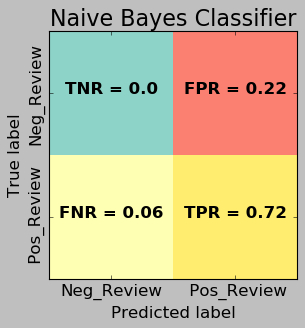

In [150]:
#Skipped due to Naive Bayes being not able to handle negative values
X_train = abs(X_train)

# Instantiating the Naive Bayes Classifier nb
nb = MultinomialNB()

# Calling the fit_predict_print_plot function I defined above
y_predicted_nb = fit_predict_print_plot(nb, 'Naive Bayes Classifier')

## Comparison of results

I will use two functions to build a DataFrame for comparison.

In [151]:
# Function for converting the classification report results to a dataframe

def get_classification_report(y_true, y_pred):
    
    '''This function takes in true (y_true) and predicted (y_pred) values of a target variable and produces 
    a classification report '''
    
    metrics_summary = precision_recall_fscore_support(y_true=y_true, y_pred=y_pred)

    avg = list(precision_recall_fscore_support(y_true=y_true, y_pred=y_pred, average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(list(metrics_summary), index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['weighted avg'] = avg

    return class_report_df.T

In [152]:
# Function for adding explanatory columns and organizing the dataframe

def build_comparison_matrix(y_test, y_pred, algorithm, vector):
    
    '''This function builds a comparison matrix as a DataFrame, given target variable test and prediction values
    as pandas Series of integers, name of the algorithm of type string and name of the word vectorizer as string'''
    
    df = get_classification_report(y_test, y_pred)
    df['class']=['neg_review', 'pos_review', 'average']
    df['accuracy']= metrics.accuracy_score(y_test, y_pred)
    df['model'] = algorithm
    df['vectorizer'] = vector
    df = df[['vectorizer', 'model', 'accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
    
    return df

In [153]:
#For loop using above functions to build CountVectorizing results table

frames = [] # empty list for collecting dataframes

y_preds = [y_predicted_logreg, y_predicted_knn, y_predicted_l_svm, y_predicted_k_svm, y_predicted_nb, y_predicted_dt,
                y_predicted_rf, y_predicted_adb, y_predicted_gbt, y_predicted_sgb, y_predicted_xgb, y_predicted_cb] 

labels = ['LogReg', 'KNN', 'LSVM', 'KSVM', 'NBayes', 'DTree', 
             'RForest', 'ABoost', 'GBoost', 'SGBoost', 'XGBoost', 'CBoost'] 

vector = 'Hashing'

for y_pred, label in zip(y_preds, labels):
    df = build_comparison_matrix(y_test, y_pred, label, vector)
    frames.append(df)

# concatenating all dataframes
df_hashing = pd.concat(frames)

df_hashing2 = df_hashing.set_index(['vectorizer', 'model', 'accuracy', 'class'])

In [154]:
df_hashing2

precision    recall  f1-score  support
vectorizer model   accuracy class                                             
Hashing    LogReg  0.784038 neg_review   1.000000  0.041667  0.080000     48.0
                            pos_review   0.781991  1.000000  0.877660    165.0
                            average      0.831119  0.784038  0.697905    213.0
           KNN     0.821596 neg_review   0.708333  0.354167  0.472222     48.0
                            pos_review   0.835979  0.957576  0.892655    165.0
                            average      0.807214  0.821596  0.797910    213.0
           LSVM    0.835681 neg_review   0.760000  0.395833  0.520548     48.0
                            pos_review   0.845745  0.963636  0.900850    165.0
                            average      0.826422  0.835681  0.815148    213.0
           KSVM    0.774648 neg_review   0.000000  0.000000  0.000000     48.0
                            pos_review   0.774648  1.000000  0.873016    165.0
                            average      0.600079  0.774648  0.676280    213.0
           NBayes  0.723005 neg_review   0.076923  0.020833  0.032787     48.0
                            pos_review   0.765000  0.927273  0.838356    165.0
                            average      0.609940  0.723005  0.656819    213.0
           DTree   0.774648 neg_review   0.000000  0.000000  0.000000     48.0
                            pos_review   0.774648  1.000000  0.873016    165.0
                            average      0.600079  0.774648  0.676280    213.0
           RForest 0.798122 neg_review   0.727273  0.166667  0.271186     48.0
                            pos_review   0.801980  0.981818  0.882834    165.0
                            average      0.785145  0.798122  0.744998    213.0
           ABoost  0.774648 neg_review   0.500000  0.020833  0.040000     48.0
                            pos_review   0.777251  0.993939  0.872340    165.0
                            average      0.714772  0.774648  0.684771    213.0
           GBoost  0.807512 neg_review   0.620690  0.375000  0.467532     48.0
                            pos_review   0.836957  0.933333  0.882521    165.0
                            average      0.788220  0.807512  0.789003    213.0
           SGBoost 0.784038 neg_review   0.541667  0.270833  0.361111     48.0
                            pos_review   0.814815  0.933333  0.870056    165.0
                            average      0.753260  0.784038  0.755365    213.0
           XGBoost 0.812207 neg_review   0.722222  0.270833  0.393939     48.0
                            pos_review   0.820513  0.969697  0.888889    165.0
                            average      0.798363  0.812207  0.777351    213.0
           CBoost  0.807512 neg_review   0.629630  0.354167  0.453333     48.0
                            pos_review   0.833333  0.939394  0.883191    165.0
                            average      0.787428  0.807512  0.786322    213.0

### Function for plotting F1 Scores of ML models

In [155]:
def f1_score_bar_plot(df, category, title):

    '''This function plots F1 scores from the given DataFrame and class'''
    
    plt.style.use('seaborn-pastel')
    df = df[df['class']==category]
    x = list(df['model'])
    y = list(df['f1-score'])
    y_round = list(round(df['f1-score'],2))
    a = (list(df['f1-score'])).index(max(list(df['f1-score'])))
    z = (list(df['f1-score'])).index(min(list(df['f1-score'])))
    y_mean = round(df['f1-score'].mean(),2)
    
    plt.rcParams['figure.figsize']=[15,5]
    b_plot = plt.bar(x=x,height=y)
    b_plot[a].set_color('blue')
    b_plot[z].set_color('magenta')
    
    for i,v in enumerate(y_round):
        plt.text(i-.2, 0.018, str(v), color='black', fontsize=15, fontweight='bold')
    
    plt.axhline(y_mean,ls='--',color='k',label=y_mean)
    plt.title(title)
    plt.legend(loc='upper right')
    
    return plt.show()

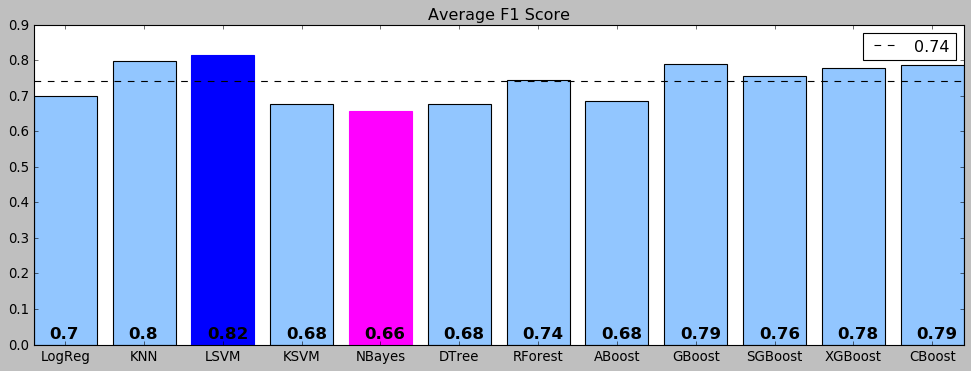

In [156]:
# Plotting F1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_hashing, category='average', title= "Average F1 Score")

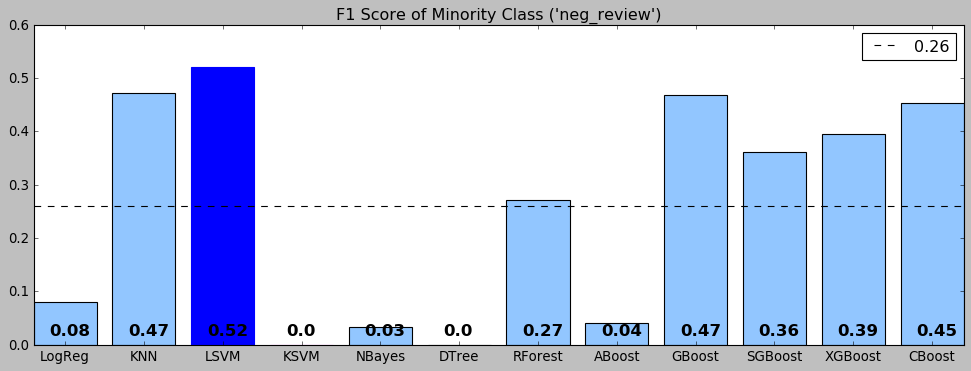

In [157]:
# Plotting F1 score of minority class ('neg_review') with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_hashing, category='neg_review', title= "F1 Score of Minority Class ('neg_review')")

- The best scores with Hashing Vectorizer, both in average and minority class F1 score was made by LSVM: 0.82 and 0.52 respectively.
- Naïve Bayes is the weakest algorithm with hashing-vectorizing.
- Among the Bag of Words vectorizers, best scores were made with Count Vectorizer by Naïve Bayes.  
- Tfidf and Hashing Vectorizers made very close scores via the LSVM algorithm.
- Count Vectorizer minority class F1 score with Naive Bayes was relatively high (0.64) by comparison to Tfidf (0.54) and Hashing (0.52) Vectorizer scores both with the LSVM machine learning algorithm.
- I will save the results for further comparison and based on the scores, I will use Count Vectorizer as the Word Vectorizer for further analysis.

In [158]:
df_hashing2.to_csv('3c_HashingVectorized.csv', sep=',', encoding='utf-8')